In [14]:
# task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors

import warnings 
warnings.filterwarnings('ignore')

In [15]:
def PointsInCircum(r, n=100):
    return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-20,20), math.sin(2*math.pi/n*x)*r + np.random.normal(-20,20)) for x in range(1, n+1)]

In [16]:
x1 = PointsInCircum(400,n = 900)
x2 = PointsInCircum(250,600)
x3 = PointsInCircum(90,200)

noise = [(np.random.randint(-500,500),np.random.randint(-500,500))for i in range(300)]

In [17]:
df = pd.DataFrame(x1+x2+x3+noise)
df

,0,1
0,374.864691,-22.862275
1,393.417449,-10.035818
2,419.744577,10.021633
3,356.912865,-5.020146
4,407.866548,-1.749571
...,...,...
1995,-264.000000,102.000000
1996,103.000000,-468.000000
1997,31.000000,-303.000000
1998,0.000000,-375.000000


Text(0, 0.5, 'col 2')

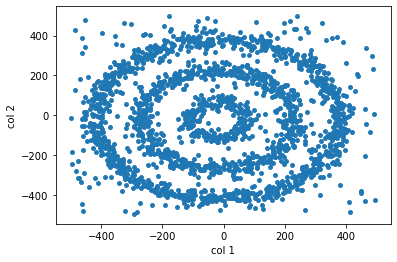

In [18]:
plt.scatter(df[0], df[1],s=15)
plt.xlabel('col 1')
plt.ylabel('col 2')

Text(0, 0.5, 'col 2')

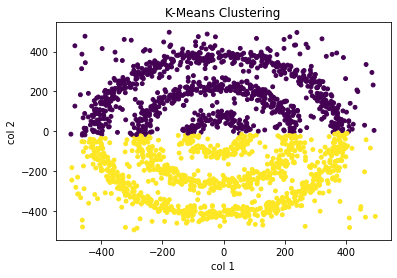

In [19]:
# task 2

k_means=KMeans(n_clusters=2)
k_means.fit(df)

df['KMeans_labels']=k_means.labels_

plt.scatter(df[0],df[1],c=df['KMeans_labels'], s= 15)
plt.title('K-Means Clustering')
plt.xlabel('col 1')
plt.ylabel('col 2')

In [20]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
hc.fit(df)

AgglomerativeClustering()

Text(0, 0.5, 'col 2')

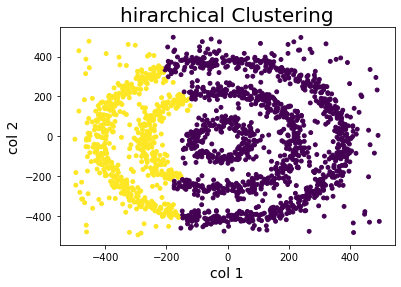

In [21]:
df['hirarchical_cluster_labels']=hc.labels_
plt.scatter(df[0],df[1],c=df['hirarchical_cluster_labels'],s=15) 
plt.title('hirarchical Clustering',fontsize=20)
plt.xlabel('col 1',fontsize=14)
plt.ylabel('col 2',fontsize=14)

In [22]:
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN()

Text(0, 0.5, 'col 2')

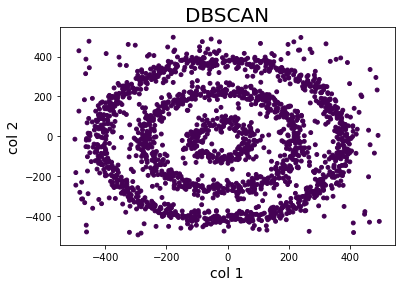

In [23]:
df['DBSCAN_labels']=dbscan.labels_
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN',fontsize=20)
plt.xlabel('col 1',fontsize=14)
plt.ylabel('col 2',fontsize=14)

Text(0, 0.5, 'Epsilon')

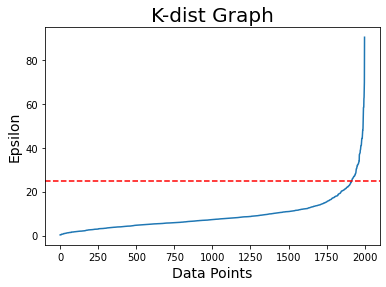

In [24]:
# task 4

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=25, color='r', linestyle='--')
plt.title('K-dist Graph',fontsize=20)
plt.xlabel('Data Points',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [25]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    993
 1    667
 2    213
-1    127
Name: DBSCAN_opt_labels, dtype: int64

Text(0, 0.5, 'col 2')

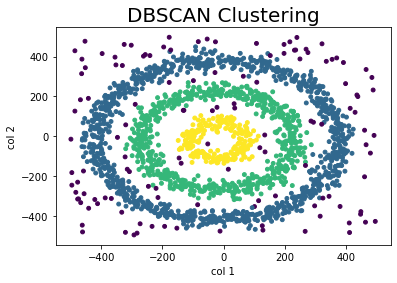

In [26]:
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('col 1')
plt.ylabel('col 2')